In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

df = pd.read_csv('cleaned/cleaned_data.csv')

Mean of TradeValue: 181161.76987179488


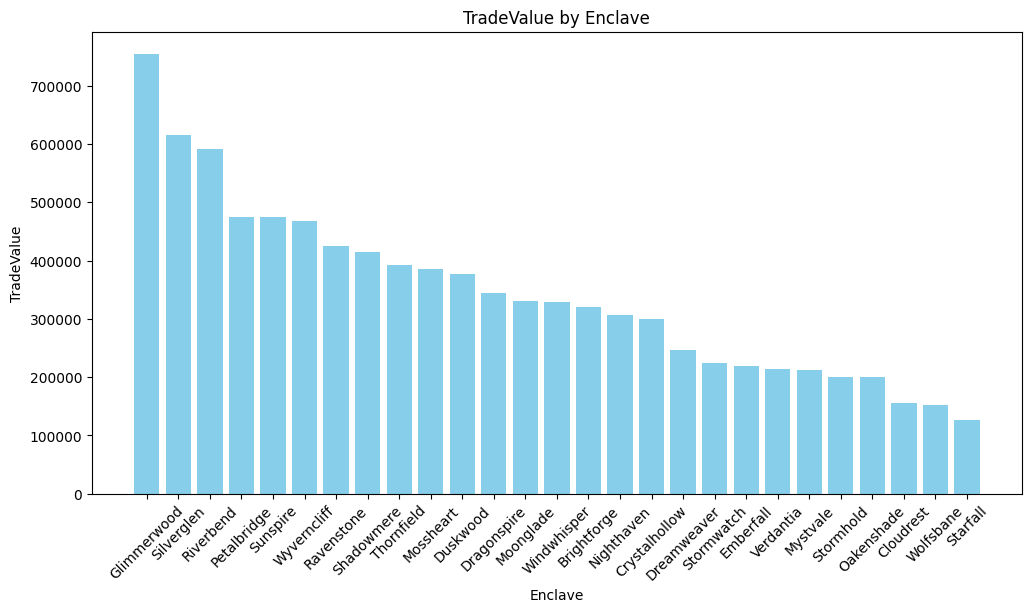

        DI  TradeValue     RealmType        Enclave  LivingQuarters     ParcelSize ParcelSizeUnit  StructuralIntegrity ExteriorCharm
0        0    269500.0   Meadowlands    Brightforge          2143.0    7939.000000           sqft                    5        Common
1        1    184900.0   Meadowlands    Brightforge           923.0   10083.000000           sqft                    5      Gleaming
2        2     87000.0  GnomeBurough    Petalbridge           959.0    9439.000000           sqft                    5        Common
3        3    130000.0   Meadowlands     Shadowmere           798.0    3869.000000           sqft                    6      Gleaming
4        4    144000.0   Meadowlands    Dragonspire          1172.0   11344.000000           sqft                    5        Common
5        5    174500.0   Meadowlands     Thornfield          1203.0   12000.000000           sqft                    7        Common
6        6    264500.0   AetherIsles    Wyverncliff          1412.0  

In [245]:
# Calculate the mean of the 'TradeValue' column
trade_value_mean = df['TradeValue'].mean()
print(f"Mean of TradeValue: {trade_value_mean}")

# Sort the 'TradeValue' column
sorted_trade_values = df.sort_values(by='TradeValue', ascending=False)

x = sorted_trade_values['Enclave']
y = sorted_trade_values['TradeValue']

plt.figure(figsize=(12, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Enclave')
plt.ylabel('TradeValue')
plt.title('TradeValue by Enclave')
plt.xticks(rotation=45)
plt.show()

print(df.to_string())

<h1> First we check what values are given </h1>

**With these values, we define our**:

- **Monthly Income**
- **Monthly Available Funds**
- **Downpayment**
- **Loan Amount**
- **Total Payments**
- **Monthly Interest Rates**
- **Monthly Payments**

Then with the forumla we define the afordability and append that to the result[], array
And then we put the affordability into a new dataframe and make a new file called ifAffordable.csv

In [246]:
import pandas as pd
import os

# Given values
Income = 30000
interest_rate_per_year = 0.04
loan_term_years = 30
downpayment_percentage = 0.20

# Calculate monthly available funds (30% of monthly income)
monthly_income = Income / 12
monthly_available_funds = 0.30 * monthly_income

# List to store results
results = []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    trade_value = row['TradeValue']


    downpayment = downpayment_percentage * trade_value
    loan_amount = trade_value - downpayment
    total_payments = loan_term_years * 12
    monthly_interest_rate = interest_rate_per_year / 12
    monthly_payment = (loan_amount * monthly_interest_rate * (1 + monthly_interest_rate) ** total_payments) / ((1 + monthly_interest_rate) ** total_payments - 1)

    # Determine if the home is affordable with 1 is affordable and 0 is not affordable
    is_affordable = 1 if monthly_payment <= monthly_available_funds else 0

    # Append result to the list
    results.append({'TradeValue': trade_value, 'AffordableDwelling': is_affordable})

# Create a new DataFrame with the results
affordable_df = pd.DataFrame(results)
df = df.merge(affordable_df, on='TradeValue', how='left')
os.makedirs('cleaned', exist_ok=True)
df.to_csv('cleaned/ifAffordable.csv', index=False)

- **Now we check whether an enclave has a high or low affordability rate.**  
  This is our first rule because we want to determine if a dwelling in a certain enclave has a high chance of being **affordable** or **not affordable**.


Enclave Affordability Statistics:
          Enclave     RealmType  AffordabilityRate  Count  \
25      Wolfsbane  GnomeBurough           1.000000    113   
18       Starfall  GnomeBurough           1.000000    110   
1       Cloudrest   Meadowlands           1.000000    176   
6       Emberfall   Meadowlands           0.999045   1047   
10       Mystvale  GnomeBurough           0.985782    422   
20     Stormwatch  GnomeBurough           0.982704    636   
3     Dragonspire   Meadowlands           0.976759   3055   
13    Petalbridge  GnomeBurough           0.969880   1494   
16     Shadowmere   Meadowlands           0.953452   1289   
19      Stormhold   Meadowlands           0.950685    365   
23      Verdantia   Meadowlands           0.948276     58   
2   Crystalhollow   Meadowlands           0.900000    710   
5        Duskwood   Meadowlands           0.866265    830   
12     Oakenshade  GnomeBurough           0.818182     77   
0     Brightforge   Meadowlands           0.797386 

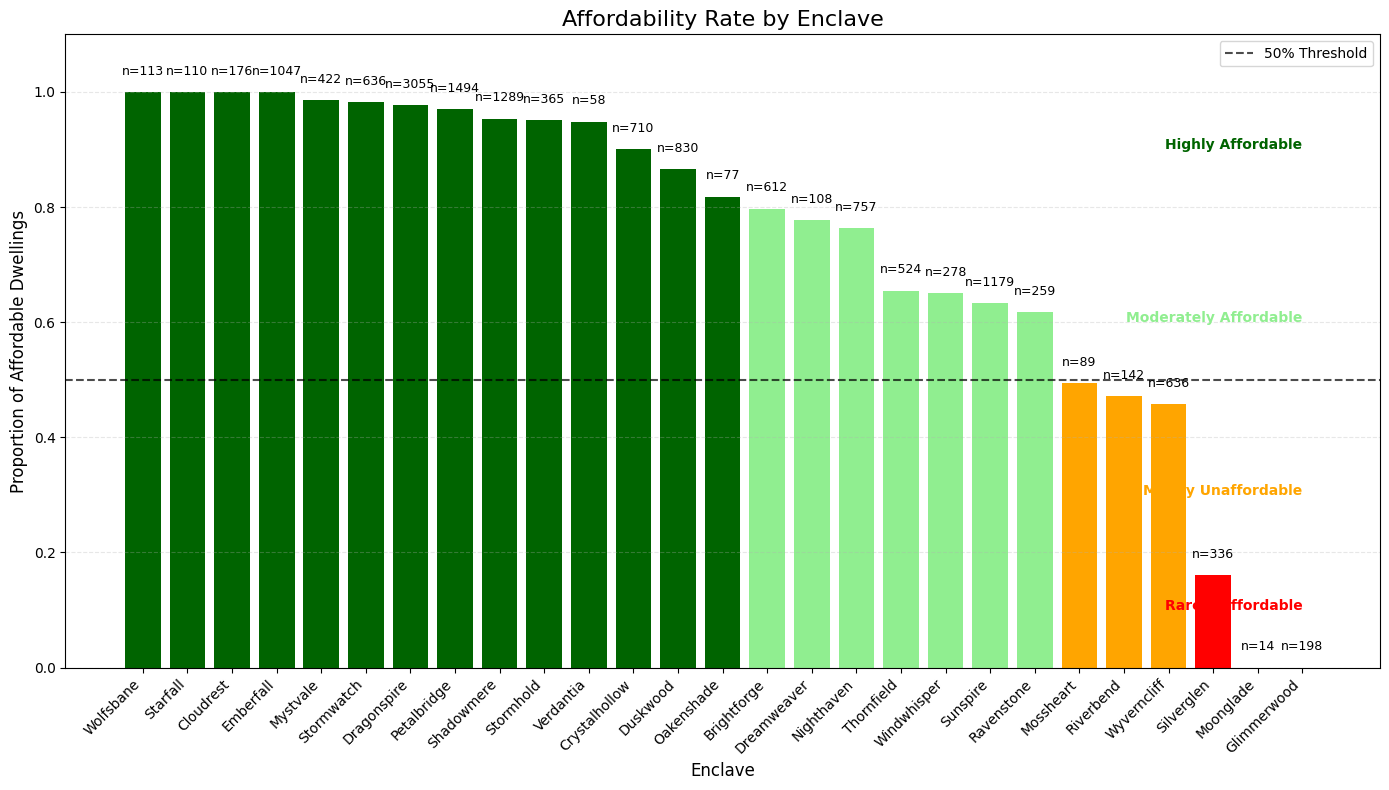

In [247]:
# Load the data
df = pd.read_csv('cleaned/ifAffordable.csv')

# Calculate affordability rate and count by enclave
enclave_stats = df.groupby('Enclave')['AffordableDwelling'].agg(['mean', 'count']).reset_index()
enclave_stats.columns = ['Enclave', 'AffordabilityRate', 'Count']
enclave_stats = enclave_stats.sort_values('AffordabilityRate', ascending=False)

# Create a color palette based on affordability rate
colors = ['darkgreen' if rate >= 0.8 else 
          'lightgreen' if rate >= 0.5 else 
          'orange' if rate >= 0.2 else 
          'red' for rate in enclave_stats['AffordabilityRate']]

# Create the plot
plt.figure(figsize=(14, 8))
bars = plt.bar(enclave_stats['Enclave'], enclave_stats['AffordabilityRate'], color=colors)

# Add count annotations to see how many dwellings are in each enclave and set the color of the text
for i, row in enumerate(enclave_stats.itertuples()):
    plt.text(i, row.AffordabilityRate + 0.03, f"n={row.Count}", ha='center', fontsize=9)

# Add threshold line at 0.5 (50% affordable), we do this so we can easily see which enclaves are above or below this threshold.
# We chose this threshold because it is the median of the affordability rate.
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.7, label='50% Threshold')

# Add category labels for better visualization and understanding
plt.text(len(enclave_stats)-1, 0.9, "Highly Affordable", ha='right', color='darkgreen', fontweight='bold')
plt.text(len(enclave_stats)-1, 0.6, "Moderately Affordable", ha='right', color='lightgreen', fontweight='bold')
plt.text(len(enclave_stats)-1, 0.3, "Mostly Unaffordable", ha='right', color='orange', fontweight='bold')
plt.text(len(enclave_stats)-1, 0.1, "Rarely Affordable", ha='right', color='red', fontweight='bold')

# Enhance the plot with labels and grid
plt.title('Affordability Rate by Enclave', fontsize=16)
plt.ylabel('Proportion of Affordable Dwellings', fontsize=12)
plt.xlabel('Enclave', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.legend()

# Add realm type information
# We do this because we want to color the bars based on the realm type of the enclave
enclave_realm = df[['Enclave', 'RealmType']].drop_duplicates().set_index('Enclave')
realm_colors = {'GnomeBurough': 'green', 'Meadowlands': 'blue', 'AetherIsles': 'purple'}

# Print table with affordability statistics
print("Enclave Affordability Statistics:")
summary_table = enclave_stats.copy()
summary_table['RealmType'] = summary_table['Enclave'].map(enclave_realm['RealmType'])

# We decided on certain thresholds to categorize the affordability rate
# These thresholds are based on the affordability rate
summary_table['AffordabilityCategory'] = pd.cut(
    summary_table['AffordabilityRate'],
    bins=[0, 0.2, 0.5, 0.8, 1.0],
    labels=['Rarely Affordable', 'Mostly Unaffordable', 'Moderately Affordable', 'Highly Affordable'],
    include_lowest=True
)
print(summary_table[['Enclave', 'RealmType', 'AffordabilityRate', 'Count', 'AffordabilityCategory']])

plt.show()

# Simple Enclave-Based Affordability Model

## Overview

We created a simple affordability model based on the affordability rate in certain enclaves because some areas have consistently higher or lower housing affordability. This allows us to establish a quick benchmark for classifying dwellings as affordable or not based on location trends.

## Model Logic

The model uses a single rule:
- If a property is located in one of the enclaves with >50% affordability rate, classify it as affordable
- Otherwise, classify it as unaffordable

### List of Affordable Enclaves (>50% Affordability Rate)
1. Petalbridge
2. Starfall
3. Stormwatch
4. Mystvale
5. Cloudrest
6. Wolfsbane
7. Crystalhollow
8. Dragonspire
9. Shadowmere
10. Thornfield
11. Brightforge
12. Duskwood
13. Sunspire
14. Wyverncliff
15. Nighthaven
16. Emberfall
17. Dreamweaver
18. Silverglen
19. Riverbend
20. Ravenstone

## Implementation


In [248]:
We assign the affordable enclaves to a list and give it a 1 for affordable and 0 for not affordable

In [5]:
def simple_affordability_model(row):
    # Enclaves with >50% affordability rate
    affordable_enclaves = [
        'Petalbridge', 'Starfall', 'Stormwatch', 'Mystvale', 'Cloudrest',
        'Wolfsbane', 'Crystalhollow', 'Dragonspire', 'Shadowmere',
        'Thornfield', 'Brightforge', 'Duskwood', 'Sunspire',
        'Wyverncliff', 'Nighthaven', 'Emberfall', 'Dreamweaver',
        'Silverglen', 'Riverbend', 'Ravenstone',
    ]
    # Simple rule: classify based only on enclave(1 affordable, 0 not affordable)
    if row['Enclave'] in affordable_enclaves:
        return 1
    else:
        return 0

# here we check our accuracy of the model
df['SimpleModelPrediction'] = df.apply(simple_affordability_model, axis=1)
accuracy = accuracy_score(df['AffordableDwelling'], df['SimpleModelPrediction'])
print(f"Accuracy: {accuracy}")




Accuracy: 0.8190021915689055


## As you can see an accuracy of 0.8 is not bad at all, but we want to improve this accuracy by adding more rules.

### We will add several rules to improve our accuracy
### We will explain every rule by adding comments above the code

In [249]:
def improved_affordability_model(row):
    # RULE 1: BASE AFFORDABILITY CLASSIFICATION BY ENCLAVE CATEGORY
    # Enclaves are categorized into different affordability levels based on historical affordability rates.
    # This is the primary rule used to classify affordability.
    # Dark green enclaves (Highly Affordable) -> Affordable
    # Light green enclaves (Moderately Affordable) -> Affordable
    # Orange enclaves (Mostly Unaffordable) -> Unaffordable
    # Red enclaves (Rarely Affordable) -> Unaffordable

    # Highly Affordable enclaves (dark green)
    if row['Enclave'] in ['Wolfsbane', 'Starfall', 'Cloudrest', 'Emberfall', 'Mystvale',
                        'Stormwatch', 'Dragonspire', 'Petalbridge', 'Shadowmere',
                        'Stormhold', 'Verdantia', 'Crystalhollow', 'Duskwood', 'Oakenshade']:
        is_affordable = True
    
    # Moderately Affordable enclaves (light green)
    elif row['Enclave'] in ['Brightforge', 'Dreamweaver', 'Nighthaven',
                           'Thornfield', 'Windwhisper', 'Sunspire', 'Ravenstone']:
        is_affordable = True
    
    # Mostly Unaffordable enclaves (orange)
    elif row['Enclave'] in ['Mossheart', 'Riverbend', 'Wyverncliff']:
        is_affordable = False
    
    # Rarely Affordable enclaves (red)
    elif row['Enclave'] in ['Silverglen', 'Moonglade', 'Glimmerwood']:
        is_affordable = False
    
    # Default case: For unknown enclaves, assume majority class
    else:
        is_affordable = True

    # RULE 2: REALM TYPE EFFECTS
    if row['RealmType'] == 'GnomeBurough':
        if row['Enclave'] not in ['Silverglen', 'Moonglade', 'Glimmerwood']:  # Rarely Affordable
            is_affordable = True

    # RULE 2: REALM TYPE EFFECTS
    # Some realms have an influence on affordability based on their general property distribution.
    # GnomeBurough is generally affordable except for a few enclaves.
    # AetherIsles tends to be unaffordable unless the enclave is highly rated.
    if row['RealmType'] == 'GnomeBurough':
        if row['Enclave'] not in ['Silverglen', 'Moonblade', 'Glimmerwood']:
            is_affordable = True
    
    if row['RealmType'] == 'AetherIsles':
        if row['Enclave'] not in ['Wolfsbane', 'Starfall', 'Cloudrest', 'Emberfall', 'Mystvale',
                                'Stormwatch', 'Dragonspire', 'Petalbridge', 'Shadowmere',
                                'Stormhold', 'Verdantia', 'Crystalhollow', 'Duskwood', 'Oakenshade']:
            is_affordable = False


    # RULE 3: PROPERTY SIZE CONSIDERATIONS
    # The size of the property influences affordability, especially in specific realms.
    # Small properties in mostly unaffordable enclaves can still be considered affordable.
    # Large properties in lower-rated enclaves are likely to be unaffordable.
    if row['RealmType'] == 'Meadowlands':
        if row['LivingQuarters'] < 900 and row['Enclave'] in ['Ravenstone', 'Moorbend', 'Riverbend', 'Wyverncliff']:
            is_affordable = True
        elif row['LivingQuarters'] > 1600 and row['Enclave'] not in ['Wolfsbane', 'Starfall', 'Cloudrest', 'Emberfall', 'Mystvale', 
                                                                'Stormwatch', 'Dragonspire', 'Petalbridge', 'Shadowmere', 
                                                                'Stormhold', 'Verdantia', 'Crystalhollow', 'Duskwood', 'Oakenshade']:
            is_affordable = False
    elif row['RealmType'] == 'GnomeBurough':
        if row['LivingQuarters'] > 1800:
            is_affordable = False
    elif row['RealmType'] == 'AetherIsles':
        if row['LivingQuarters'] < 1000:
            is_affordable = True
        elif row['LivingQuarters'] > 1300:
            is_affordable = False
    # RULE 4: QUALITY FACTORS
    if row['ExteriorCharm'] == 'Enchanting':
        if row['Enclave'] not in ['Wolfsbane', 'Starfall', 'Cloudrest', 'Emberfall', 'Mystvale',
            'Stormwatch', 'Dragonspire', 'Petalbridge', 'Shadowmere',
            'Stormhold', 'Verdantia', 'Crystalhollow', 'Duskwood', 'Oakenshade']:
            is_affordable = False

    if row['ExteriorCharm'] == 'Common':
        if row['Enclave'] in ['Ravenstone', 'Moorbend', 'Riverbend', 'Wyverncliff']:
            is_affordable = True


    # RULE 5: PARCEL SIZE EFFECTS
    # Properties with very large parcels tend to be unaffordable unless they are in a highly rated enclave.
    # Very small properties in mostly unaffordable enclaves can be affordable.
    if row['ParcelSize'] > 15000:
        if row['Enclave'] not in ['Wolfsbane', 'Starfall', 'Cloudrest', 'Emberfall', 'Mystvale',
                                'Stormwatch', 'Dragonspire', 'Petalbridge', 'Shadowmere',
                                'Stormhold', 'Verdantia', 'Crystalhollow', 'Duskwood', 'Oakenshade']:
            is_affordable = False

    if row['ParcelSize'] < 3500 and row['LivingQuarters'] < 1000:
        if row['Enclave'] in ['Ravenstone', 'Moorbend', 'Riverbend', 'Wyverncliff',
                            'Brightforge', 'Dreamweaver', 'Nighthaven', 'Thornfield', 'Windwhisper', 'Sunspire']:
            is_affordable = True

    # RULE 7: BALANCE CORRECTIONS FOR EDGE CASES
    if row['LivingQuarters'] < 700 and not row['Enclave'] in ['Moorbend', 'Glimmerwood']:
        is_affordable = True

    if row['LivingQuarters'] > 2000:
        is_affordable = False

    return 1 if is_affordable else 0;

=== Classification Report: Simple Model ===
               precision    recall  f1-score   support

           0       0.36      0.16      0.22      2507
           1       0.85      0.95      0.90     13007

    accuracy                           0.82     15514
   macro avg       0.61      0.55      0.56     15514
weighted avg       0.77      0.82      0.79     15514


=== Classification Report: Improved Model ===
               precision    recall  f1-score   support

--- IMPROVED MODEL ---
Accuracy: 0.8781
Precision: 0.9128
Recall: 0.9449
F1 Score: 0.9286

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.53      0.59      2507
           1       0.91      0.94      0.93     13007

    accuracy                           0.88     15514
   macro avg       0.78      0.74      0.76     15514
weighted avg       0.87      0.88      0.87     15514


Confusion Matrix:
[[ 1333  1174]
 [  717 12290]]


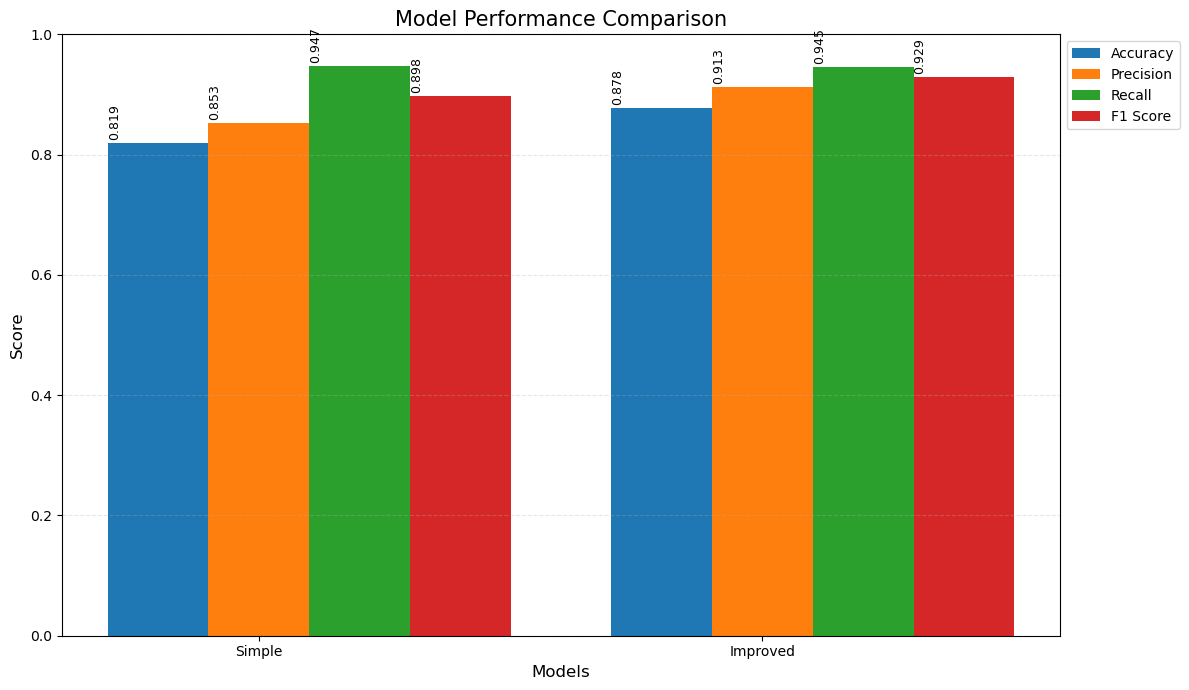

,Count,True_Affordability_Rate,Simple_Accuracy,Improved_Accuracy,Accuracy_Improvement
Enclave,,,,,
Stormhold,365.0,0.950685,0.049315,1.000000,0.950685
Verdantia,58.0,0.948276,0.051724,0.948276,0.896552
Silverglen,336.0,0.160714,0.160714,0.803571,0.642857
Oakenshade,77.0,0.818182,0.181818,0.818182,0.636364
Riverbend,142.0,0.471831,0.471831,0.725352,0.253521
Windwhisper,278.0,0.651079,0.348921,0.579137,0.230216
Wyverncliff,636.0,0.457547,0.457547,0.639937,0.182390
Brightforge,612.0,0.797386,0.797386,0.877451,0.080065
Nighthaven,757.0,0.763540,0.763540,0.838838,0.075297


In [250]:
# Define true labels and predictions
y_true = df["AffordableDwelling"]
y_pred_simple = df["Simple_Prediction"]
y_pred_improved = df["Improved_Prediction"]

# Compute confusion matrices
conf_matrix_simple = confusion_matrix(y_true, y_pred_simple)
conf_matrix_improved = confusion_matrix(y_true, y_pred_improved)

# Generate classification reports
report_simple = classification_report(y_true, y_pred_simple, output_dict=True)
report_improved = classification_report(y_true, y_pred_improved, output_dict=True)

# Display classification reports
print("=== Classification Report: Simple Model ===\n", classification_report(y_true, y_pred_simple))
print("\n=== Classification Report: Improved Model ===\n", classification_report(y_true, y_pred_improved))

# Visualize classification matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Simple Model Classification Matrix
sns.heatmap(conf_matrix_simple, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Classification Matrix: Simple Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Improved Model Classification Matrix
sns.heatmap(conf_matrix_improved, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Classification Matrix: Improved Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Visualize classification metrics using bar charts
metrics = ["accuracy", "precision", "recall", "f1-score"]
labels = ["Simple Model", "Improved Model"]

# Extract metric values
simple_metrics = [report_simple["accuracy"], report_simple["1"]["precision"], report_simple["1"]["recall"], report_simple["1"]["f1-score"]]
improved_metrics = [report_improved["accuracy"], report_improved["1"]["precision"], report_improved["1"]["recall"], report_improved["1"]["f1-score"]]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width/2, simple_metrics, width, label="Simple Model", color="blue")
ax.bar(x + width/2, improved_metrics, width, label="Improved Model", color="green")

ax.set_xlabel("Metrics")
ax.set_ylabel("Score")
ax.set_title("Comparison of Classification Metrics")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.show()